In [1]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')

from austen import Logger
from pathlib import Path
import joblib
import networkx as nx
import matplotlib.pyplot as plt

from bike.model.graph import Graph
from bike.model.edge import Edge
from bike.util.snap import snap_vertices, get_snapped_ids
from bike.util.preprocessing import smooth_graph, remove_snapped
from bike.util.evaluation import add_edge
from copy import deepcopy
from tqdm import tqdm

In [2]:
VERTICES_BIKES_PATH = Path('../bike/test/vertices_test_bikes.csv')
EDGES_BIKES_PATH = Path('../bike/test/edges_test_bikes.csv')

VERTICES_ROADS_PATH = Path('../bike/test/vertices_test_roads.csv')
EDGES_ROADS_PATH = Path('../bike/test/edges_test_roads.csv')

bikes = Graph(VERTICES_BIKES_PATH, EDGES_BIKES_PATH)
roads = Graph(VERTICES_ROADS_PATH, EDGES_ROADS_PATH)

snapped = snap_vertices(roads, deepcopy(bikes))

pos_bikes = {int(id): (v.x, v.y) for id, v in bikes.vertices_by_id.items()}
pos_roads = {int(id): (v.x, v.y) for id, v in roads.vertices_by_id.items()}
pos_snapped = {int(id): (v.x, v.y) for id, v in snapped.vertices_by_id.items()}


Vertices: 100%|██████████| 22/22 [00:00<00:00, 90.17it/s]


In [3]:
edge1 = roads.edges[66]
edge2 = roads.edges[51]
edge3 = Edge(
    id=None,
    v1=roads.vertices_by_id[41],
    v2=roads.vertices_by_id[45]
)

test_graph1 = add_edge(snapped, edge1)
test_graph2 = add_edge(snapped, edge2)
test_graph3 = add_edge(snapped, edge3)

Oryginalne bikes

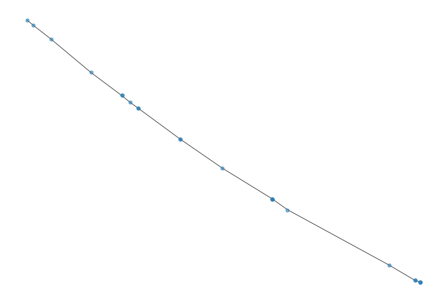

In [4]:
nx.draw(snapped.nx_graph, pos_snapped, node_size=10, alpha=0.5)

Nowa krawedz - dwa nowe wierzcholki

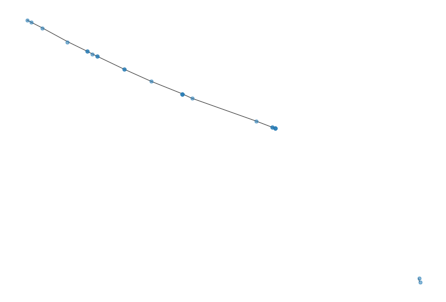

In [5]:
pos = {int(id): (v.x, v.y) for id, v in test_graph1.vertices_by_id.items()}
nx.draw(test_graph1.nx_graph, pos, node_size=10, alpha=0.5)

Nowa krawedz - jeden nowy wierzcholek

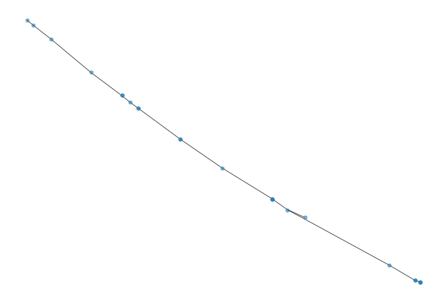

In [6]:
pos = {int(id): (v.x, v.y) for id, v in test_graph2.vertices_by_id.items()}
nx.draw(test_graph2.nx_graph, pos, node_size=10, alpha=0.5)

Nowa krawedz - bez nowych wierzcholkow

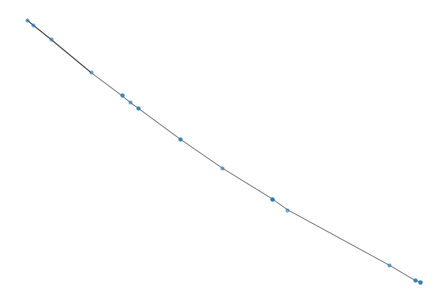

In [7]:
nx.draw(test_graph3.nx_graph, pos_snapped, node_size=10, alpha=0.5)